In [1]:
## Comaptibility of Altair to Jupyter Notebook.
## The code below require Altair version 3.0 or above which indeed require Jupyter lab version 1.0 or above. 
## To process and update the same the following code needs to be uncommented and Vega package needs to be installed.
## We need to execute this code each time loading this page. We have to Restart Kernel and clear output after executing the below commands.
## !pip install --upgrade altair
## !pip install vega vega_datasets

# Question 2

In Question 2 of the assignment, we have to calculate different measures on the scores predicted by the ML model based on the confusion matrix.

In [2]:
import pandas as pd
import numpy as np


df2 = pd.read_csv('A2_Q2.csv')
df2.sample(5)

,ID,Target,Score
15,16,True,0.27
22,23,False,0.72
28,29,True,0.68
26,27,True,0.48
25,26,True,0.63


## Part A

In this part of question 2, we have to generate confusion matrix on the data provided. 
we are considering 0.5 as a threshold value and 'True' as a positive target level.

First we sort the dataframe by ascending order of the 'Score' value. and then add a 'Prediction' feature based on the Score value and threshold.

In [3]:
df2 = df2.sort_values(by= 'Score').reset_index(drop = True)
df2.loc[df2['Score']< 0.5, 'Prediction'] = False
df2.loc[df2['Score']> 0.5, 'Prediction'] = True
df2

,ID,Target,Score,Prediction
0,21,False,0.03,False
1,8,False,0.11,False
2,30,False,0.14,False
3,2,False,0.14,False
4,7,False,0.17,False
5,5,False,0.24,False
6,11,False,0.26,False
7,16,True,0.27,False
8,10,True,0.32,False
9,18,False,0.35,False


The Next step is to create Confusion matrix of the '**Target**' and '**prediction**' feature using '**crosstab**' function in pandas.

This confusion matrix is in the form [(True Negative, False positive)X(False Negative, True Positive)]

In [4]:
CM = pd.crosstab(df2['Target'], df2['Prediction'])
CM

Prediction,False,True
Target,,
False,11,6
True,4,9


## Part B

The next step is to assign values to variable TN, FP, FN and TP accordingly. 
We will use this variables to calculate different measures like,
1. Error Rate
2. Precision
3. TPR(True Positive Rate)(a.k.a 'Recall')
4. F1_Score
5. FPR(False Positive Rate)

We will create df_metrics data frame consist of the metric and its value.

In [5]:
## Assign values to True Positive, True Negative, False Positive and False Negative
TN = CM.iloc[0,0]
FP = CM.iloc[0,1]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]

Error_Rate = round((FP+FN)/(TP+TN+FP+FN), 2)
Precision = round((TP)/(TP+FP),2)
Recall = round((TP)/(TP+FN), 2)
F1_Score = 2 * ((Precision*Recall)/(Precision+Recall))
F1_Score = round(F1_Score, 2)
FPR= round((FP)/(TN+FP), 2)

df_metrics = pd.DataFrame(columns = ['Metric', 'Value'])
df_metrics.loc[len(df_metrics)] = ['Error_Rate', Error_Rate]
df_metrics.loc[len(df_metrics)] = ['Precision', Precision]
df_metrics.loc[len(df_metrics)] = ['TPR(True Positive Rate)', Recall]
df_metrics.loc[len(df_metrics)] = ['F1_Score', F1_Score]
df_metrics.loc[len(df_metrics)] = ['FPR(False Positive Rate)', FPR]

df_metrics

,Metric,Value
0,Error_Rate,0.33
1,Precision,0.60
2,TPR(True Positive Rate),0.69
3,F1_Score,0.64
4,FPR(False Positive Rate),0.35


## Part C

In this part of question 2, We will calculate TPR and FPR values by varying threshold values from 0.1 to 0.9 in 0.1 increments.

We have to store them in a data frame called 'df_roc' in format ['Threshold value', 'TPR', 'FPR'].

For that we have created a method which will compute TPR and FPR values for provided threshold and append it into the data frame.

In [6]:
def ROC_calculation(df, Threshold):
    df.loc[df2['Score']< Threshold, 'Prediction'] = False
    df.loc[df2['Score']> Threshold, 'Prediction'] = True
    C_matrix = pd.crosstab(df['Target'],df['Prediction'])
    TN = C_matrix.iloc[0,0]
    FP = C_matrix.iloc[0,1]
    FN = C_matrix.iloc[1,0]
    TP = C_matrix.iloc[1,1]
    Recall = round((TP)/(TP+FN), 2)
    FPR= round((FP)/(TN+FP), 2)
    df_roc.loc[len(df_roc)]= [Threshold, Recall, FPR]

In [7]:
df_roc = pd.DataFrame(columns = ['Threshold', 'TPR', 'FPR'])
for i in np.arange(0.1,1,0.1):
    ROC_calculation(df2, i)

In [8]:
df_roc

,Threshold,TPR,FPR
0,0.1,1.00,0.94
1,0.2,1.00,0.71
2,0.3,0.92,0.59
3,0.4,0.85,0.47
4,0.5,0.69,0.35
5,0.6,0.62,0.24
6,0.7,0.46,0.12
7,0.8,0.31,0.06
8,0.9,0.08,0.00


## Part D

In this part of question 2,  we have to generate ROC curve along with the AUC (Area Under Coverage).

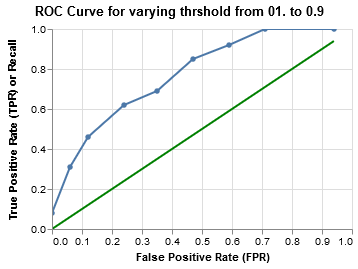

In [9]:
import altair as alt
alt.renderers.enable('notebook')

base = alt.Chart(df_roc, 
                 title='ROC Curve for varying thrshold from 01. to 0.9'
                ).properties(width=300)

roc_curve = base.mark_line(point=True).encode(
    alt.X('FPR', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('TPR', title='True Positive Rate (TPR) or Recall'),
)

roc_rule = base.mark_line(color='green').encode(
    x='FPR',
    y='FPR',
    size=alt.value(2)
)
(roc_curve + roc_rule).interactive()

Question 2 wrap-up.
1. df_metrics
2. df_roc

In [10]:
df_metrics

,Metric,Value
0,Error_Rate,0.33
1,Precision,0.60
2,TPR(True Positive Rate),0.69
3,F1_Score,0.64
4,FPR(False Positive Rate),0.35


In [11]:
df_roc

,Threshold,TPR,FPR
0,0.1,1.00,0.94
1,0.2,1.00,0.71
2,0.3,0.92,0.59
3,0.4,0.85,0.47
4,0.5,0.69,0.35
5,0.6,0.62,0.24
6,0.7,0.46,0.12
7,0.8,0.31,0.06
8,0.9,0.08,0.00
